In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
datos= pd.read_csv("Base Datos_PROT_CA_MAMA.csv")

In [ ]:
datos.head()

,Numero progresivo,Edad,consultorio,Turno Mat-1 Vesp-2,Estado civil: 1. soltera 2.casada 3.viuda 4.Divorciada 5. U. libre,Escolaridad 1.ninguna 2.primaria 3. secund 4.prepa 5.licenciat 6.potgrado,Religion 1.Ninguna 2.Catolica 3. Cristiana 4.T Jeova 5.Judia 6.otra,Tiene hijos 0. No 1. Si,Cuantos Hijos,Familiares con Ca de mama 0.No 1.Si,...,Si Labora fuera de casa cuantas horas,Le han informado sobre el Ca de mama 1.Si 2. No,Considera que la auto exploracion es suficiente 1.Si 2.No,Se ha realizado mastografia 1.Si 2.No,Motivos 1.Desconoce 2.Miedo 3.F. tiempo 4.No interes 5.no me deja mi pareja 6.No creo que me de CA,Otros motivos 0.No. 1.Si (Anotar aparte),Considera que es importante hacerce estudios 1.Si 2.No,Dependiente economicos 0.No 1.Si,En caso de que si cuantas personas dependen,Principal responsable del aporte economico 1.Usted 2.Pareja 3.Ambos 4.Otra
0,1.0,39.0,11.0,1.0,2.0,4.0,2.0,1.0,2.0,0.0,...,NaN,1.0,1.0,1.0,NaN,0.0,1.0,1.0,2.0,2.0
1,2.0,53.0,7.0,1.0,2.0,2.0,2.0,1.0,3.0,0.0,...,NaN,1.0,1.0,1.0,NaN,0.0,1.0,0.0,NaN,2.0
2,3.0,44.0,11.0,1.0,1.0,3.0,2.0,1.0,2.0,0.0,...,NaN,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
3,4.0,49.0,5.0,1.0,2.0,5.0,2.0,1.0,1.0,0.0,...,NaN,2.0,1.0,1.0,NaN,0.0,1.0,0.0,NaN,2.0
4,5.0,25.0,2.0,1.0,1.0,5.0,2.0,0.0,NaN,0.0,...,8.0,2.0,2.0,2.0,NaN,1.0,1.0,0.0,NaN,4.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 21 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Numero progresivo                                                                                           378 non-null    float64
 1   Edad                                                                                                        378 non-null    float64
 2   consultorio                                                                                                 378 non-null    float64
 3   Turno     Mat-1     Vesp-2                                                                                  378 non-null    float64
 4   Estado civil: 1. soltera 2.casada 3.viuda 4.Divorciada 5. U. libre  

In [ ]:
# Renombrar columnas para hacerlas más manejables
column_mapping = {
    "Se ha realizado mastografia 1.Si   2.No": "mastografia",
    "Edad": "edad",
    "Estado civil: 1. soltera 2.casada 3.viuda 4.Divorciada 5. U. libre": "estado_civil",
    "Escolaridad 1.ninguna 2.primaria 3. secund 4.prepa 5.licenciat 6.potgrado": "escolaridad",
    "Religion 1.Ninguna 2.Catolica 3. Cristiana 4.T Jeova 5.Judia 6.otra": "religion",
    "Tiene hijos 0. No  1. Si": "tiene_hijos",
    "Cuantos Hijos": "num_hijos",
    "Familiares con Ca de mama   0.No  1.Si": "familiar_ca_mama",
    "Labora en: 1.casa.       2. fuera de casa.          3. ambos": "labora",
    "Le han informado sobre el Ca de mama 1.Si   2. No": "informada_ca_mama",
    "Considera que la auto exploracion es suficiente 1.Si   2.No": "cree_autoexploracion_suficiente",
    "Considera que es importante hacerce estudios   1.Si   2.No": "cree_importante_estudios",
    "Dependiente economicos 0.No   1.Si": "tiene_dependientes",
    "Principal responsable del aporte economico 1.Usted 2.Pareja 3.Ambos 4.Otra": "responsable_economico"
}

# Aplicar los nuevos nombres
df = datos.rename(columns=column_mapping)

# Seleccionar las columnas de interés
df = df[list(column_mapping.values())]

# Convertir variables categóricas a numéricas
df["mastografia"] = df["mastografia"].replace({1: 1, 2: 0})  # 1 = Sí, 0 = No

# Eliminar filas con valores nulos en las columnas clave
df = df.dropna()

# Revisar los datos después de la limpieza
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 376
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mastografia                      287 non-null    float64
 1   edad                             287 non-null    float64
 2   estado_civil                     287 non-null    float64
 3   escolaridad                      287 non-null    float64
 4   religion                         287 non-null    float64
 5   tiene_hijos                      287 non-null    float64
 6   num_hijos                        287 non-null    float64
 7   familiar_ca_mama                 287 non-null    float64
 8   labora                           287 non-null    float64
 9   informada_ca_mama                287 non-null    float64
 10  cree_autoexploracion_suficiente  287 non-null    float64
 11  cree_importante_estudios         287 non-null    float64
 12  tiene_dependientes         

(None,
    mastografia  edad  estado_civil  escolaridad  religion  tiene_hijos  \
 0          1.0  39.0           2.0          4.0       2.0          1.0   
 1          1.0  53.0           2.0          2.0       2.0          1.0   
 2          1.0  44.0           1.0          3.0       2.0          1.0   
 3          1.0  49.0           2.0          5.0       2.0          1.0   
 5          0.0  41.0           5.0          4.0       2.0          1.0   
 
    num_hijos  familiar_ca_mama  labora  informada_ca_mama  \
 0        2.0               0.0     1.0                1.0   
 1        3.0               0.0     1.0                1.0   
 2        2.0               0.0     1.0                1.0   
 3        1.0               0.0     1.0                2.0   
 5        2.0               0.0     2.0                1.0   
 
    cree_autoexploracion_suficiente  cree_importante_estudios  \
 0                              1.0                       1.0   
 1                              1.0  

Optimization terminated successfully.
         Current function value: 0.488066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            mastografia   No. Observations:                  287
Model:                          Logit   Df Residuals:                      274
Method:                           MLE   Df Model:                           12
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.2831
Time:                        22:27:51   Log-Likelihood:                -140.07
converged:                       True   LL-Null:                       -195.39
Covariance Type:            nonrobust   LLR p-value:                 4.488e-18
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
edad                                0.1176      0.018      6.661  

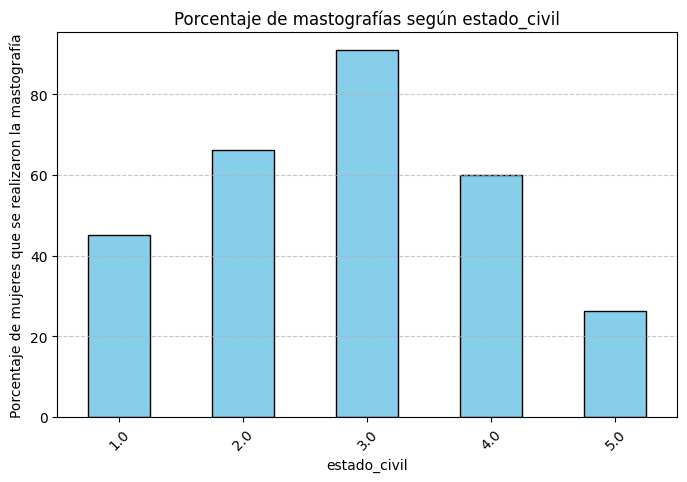


Porcentaje de mujeres que sí se hicieron la mastografía según escolaridad:

escolaridad
1.0     0.000000
2.0    75.000000
3.0    51.685393
4.0    55.056180
5.0    59.090909
6.0    83.333333
Name: mastografia, dtype: float64


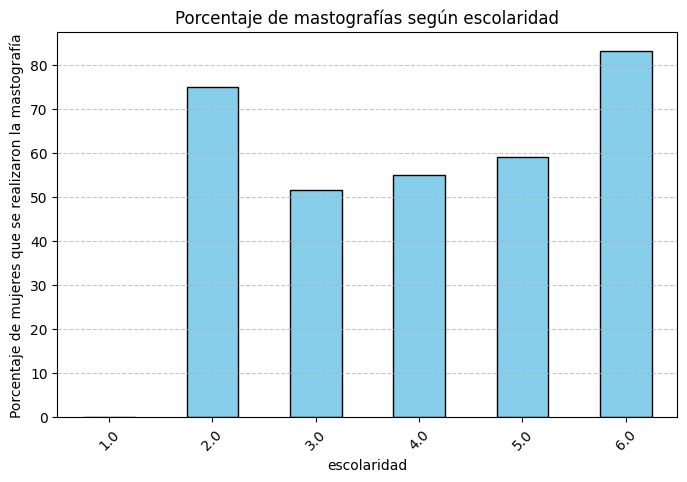


Porcentaje de mujeres que sí se hicieron la mastografía según religion:

religion
1.0     38.461538
2.0     60.810811
3.0     52.631579
4.0     75.000000
5.0    100.000000
6.0    100.000000
Name: mastografia, dtype: float64


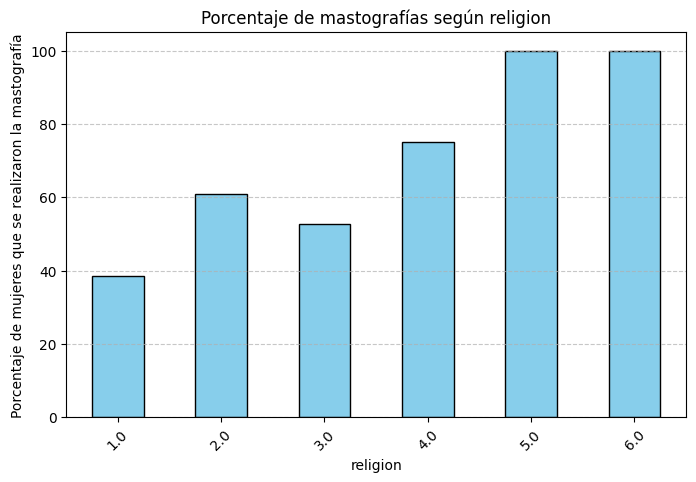


Porcentaje de mujeres que sí se hicieron la mastografía según tiene_hijos:

tiene_hijos
1.0    57.839721
Name: mastografia, dtype: float64


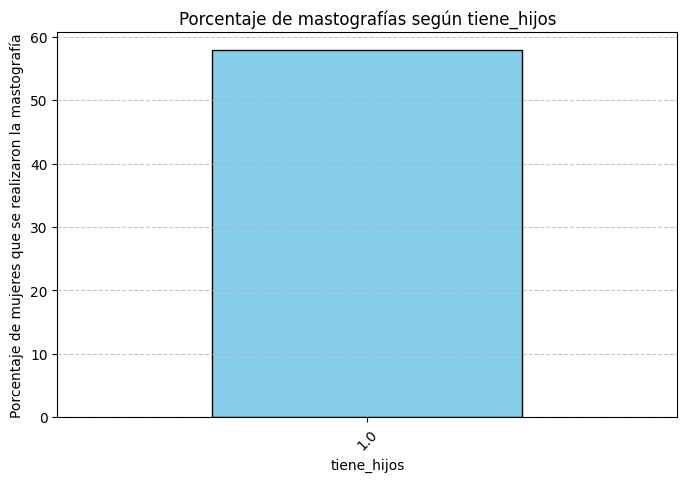


Porcentaje de mujeres que sí se hicieron la mastografía según num_hijos:

num_hijos
1.0     40.540541
2.0     64.516129
3.0     60.317460
4.0     65.000000
5.0     75.000000
6.0    100.000000
7.0    100.000000
Name: mastografia, dtype: float64


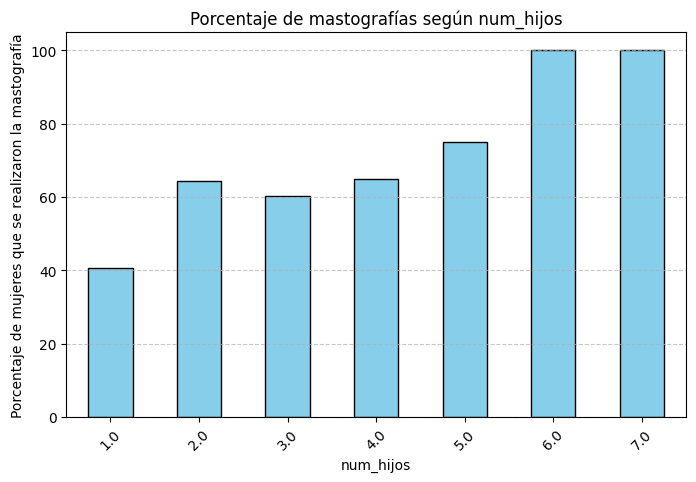


Porcentaje de mujeres que sí se hicieron la mastografía según familiar_ca_mama:

familiar_ca_mama
0.0    56.016598
1.0    67.391304
Name: mastografia, dtype: float64


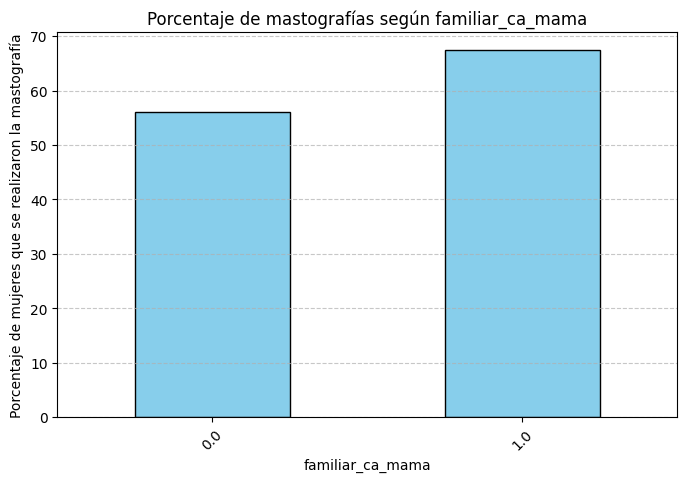


Porcentaje de mujeres que sí se hicieron la mastografía según labora:

labora
1.0    61.309524
2.0    51.960784
3.0    58.823529
Name: mastografia, dtype: float64


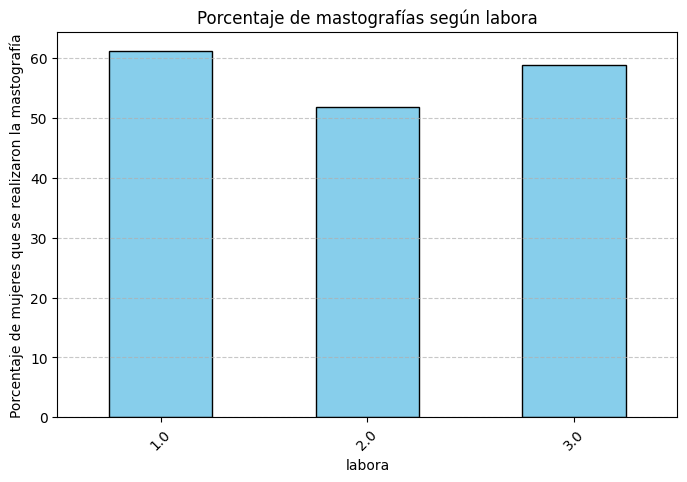


Porcentaje de mujeres que sí se hicieron la mastografía según informada_ca_mama:

informada_ca_mama
1.0    67.973856
2.0    46.268657
Name: mastografia, dtype: float64


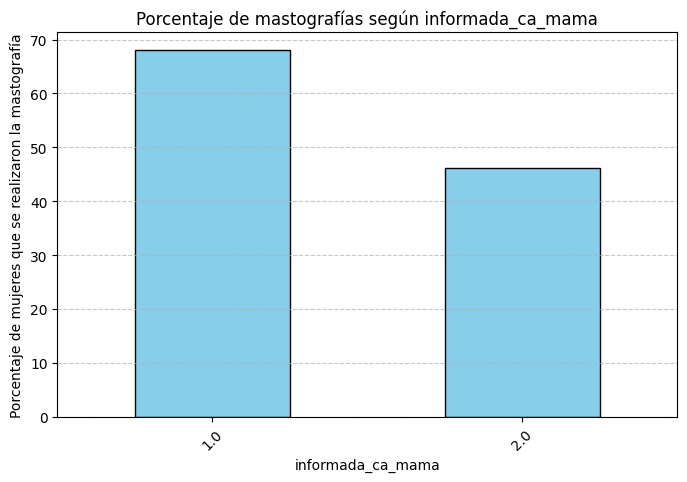


Porcentaje de mujeres que sí se hicieron la mastografía según cree_autoexploracion_suficiente:

cree_autoexploracion_suficiente
1.0    45.945946
2.0    65.340909
Name: mastografia, dtype: float64


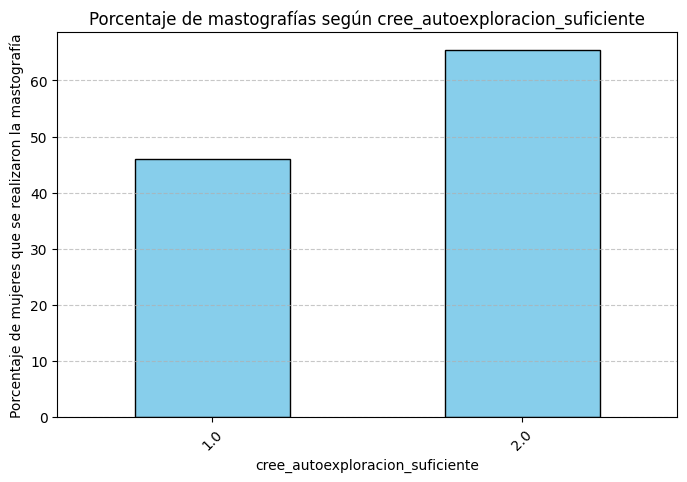


Porcentaje de mujeres que sí se hicieron la mastografía según cree_importante_estudios:

cree_importante_estudios
1.0    58.510638
2.0    20.000000
Name: mastografia, dtype: float64


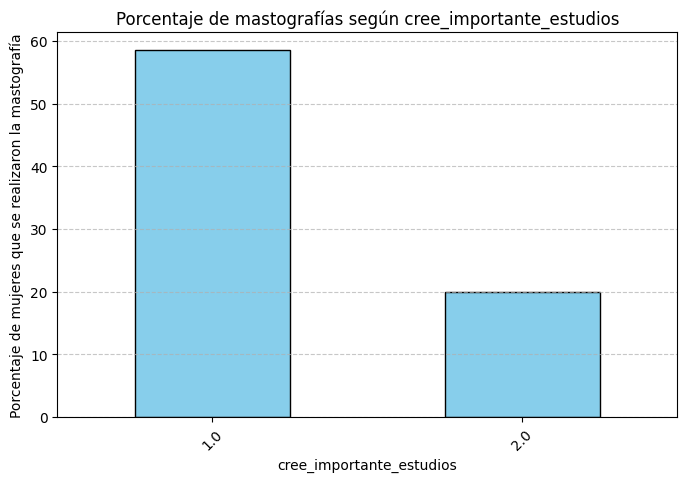


Porcentaje de mujeres que sí se hicieron la mastografía según tiene_dependientes:

tiene_dependientes
0.0    65.584416
1.0    48.872180
Name: mastografia, dtype: float64


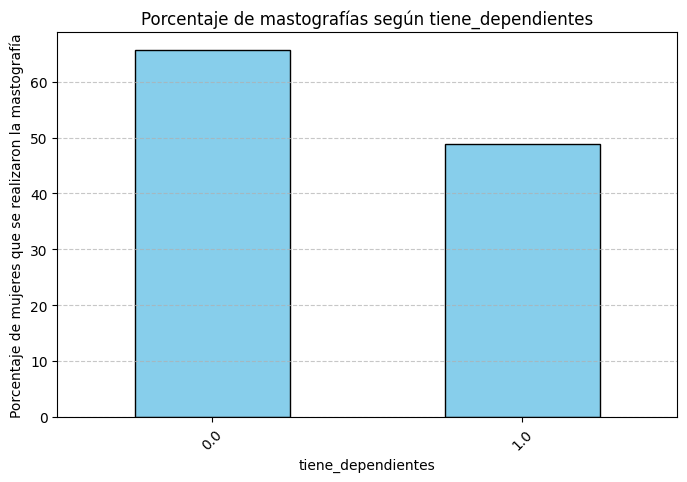


Porcentaje de mujeres que sí se hicieron la mastografía según responsable_economico:

responsable_economico
1.0    52.127660
2.0    61.842105
3.0    56.666667
4.0    54.545455
Name: mastografia, dtype: float64


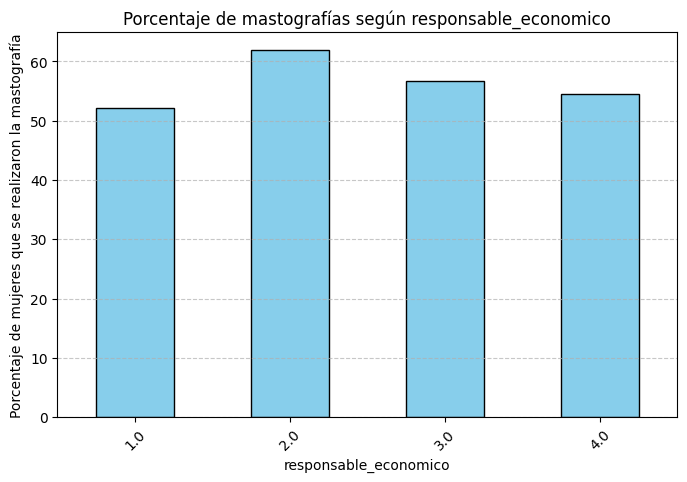

In [ ]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convertir variables categóricas a numéricas
df["mastografia"] = df["mastografia"].replace({1: 1, 2: 0})  # 1 = Sí, 0 = No

# Eliminar filas con valores nulos
df = df.dropna()

# Variables independientes y dependiente
X = df[['edad', 'estado_civil', 'escolaridad', 'religion', 'tiene_hijos',
        'num_hijos', 'familiar_ca_mama', 'labora', 'informada_ca_mama',
        'cree_autoexploracion_suficiente', 'cree_importante_estudios',
        'tiene_dependientes', 'responsable_economico']]
y = df['mastografia']

# Agregar constante para el modelo
X = sm.add_constant(X)

# Ajustar modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Mostrar resultados del modelo
print(result.summary())

predicted_probs = result.predict(X)

predicted_classes = (predicted_probs >= 0.5).astype(int)

accuary = accuracy_score(y, predicted_classes)
print(f"La presición del modelo : {accuary:.4f}")

conf_matrix= confusion_matrix(y, predicted_classes)
print("La matriz de confusión: ")
print(conf_matrix)

class_report= classification_report(y, predicted_classes)
print("Reporte de clasificación:")
print(class_report)
# Calcular y graficar porcentaje de mujeres que sí se hicieron la mastografía por variable
for column in X.columns[1:]:  # Omitimos la constante
    porcentaje = df.groupby(column)['mastografia'].mean() * 100
    print(f"\nPorcentaje de mujeres que sí se hicieron la mastografía según {column}:\n")
    print(porcentaje)

    # Graficar histograma
    plt.figure(figsize=(8, 5))
    porcentaje.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Porcentaje de mujeres que se realizaron la mastografía")
    plt.title(f"Porcentaje de mastografías según {column}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    plt.close()
